<h1> Coursera Capstone Project - Housing Sales Prices and Venues Data Analysis of Melbourne, Australia </h1> <br> <br>

In [25]:
#import libraries neccessary


import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

#!pip install matplotlib
from matplotlib import pyplot as plt  # plotting library
%matplotlib inline

import requests
#!pip install folium
import folium
#!pip install geopy
from geopy import Nominatim

print('libraries imported!')

libraries imported!


In [26]:
# input variables - Housing budget from the client/user

BUDGET = input("Please enter your housing budget (in Millions AU$): ")
BUDGET = float(BUDGET)

Please enter your housing budget (in Millions AU$): 0.3


In [27]:
# cleaning Melbourne Housing Market dataset


filtered_columns = ['Suburb', 'Address', 'Rooms', 'Price', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Landsize', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude']
housing_data = pd.read_csv('Melbourne_housing_FULL.csv', usecols=filtered_columns, parse_dates=True)

# renaming columns
housing_data.rename(columns={'Bedroom2':'Bedrooms', 'Longtitude':'Longitude', 'Price':'Price(in$M)'}, inplace=True)

#changing column types
housing_data.drop([29483], inplace=True)  # Postcode is null for this entry
housing_data.dropna(subset=['Lattitude', 'Longitude'], inplace=True) # Geolocations not available
housing_data = housing_data.astype({'Date': 'datetime64', 'Postcode':'int64'})

# dropping rows where Price is null
housing_data.drop(housing_data[housing_data['Price(in$M)'].isnull()].index, inplace=True)
housing_data = housing_data.reset_index(drop=True)

# changing Price values per 1 Million dollors
housing_data['Price(in$M)'] = housing_data['Price(in$M)'].apply(lambda price: price / 1000000)

housing_data.head()

,Suburb,Address,Rooms,Price(in$M),Date,Distance,Postcode,Bedrooms,Landsize,YearBuilt,CouncilArea,Lattitude,Longitude
0,Abbotsford,85 Turner St,2,1.480,2016-03-12,2.5,3067,2.0,202.0,NaN,Yarra City Council,-37.7996,144.9984
1,Abbotsford,25 Bloomburg St,2,1.035,2016-04-02,2.5,3067,2.0,156.0,1900.0,Yarra City Council,-37.8079,144.9934
2,Abbotsford,5 Charles St,3,1.465,2017-04-03,2.5,3067,3.0,134.0,1900.0,Yarra City Council,-37.8093,144.9944
3,Abbotsford,40 Federation La,3,0.850,2017-04-03,2.5,3067,3.0,94.0,NaN,Yarra City Council,-37.7969,144.9969
4,Abbotsford,55a Park St,4,1.600,2016-04-06,2.5,3067,3.0,120.0,2014.0,Yarra City Council,-37.8072,144.9941


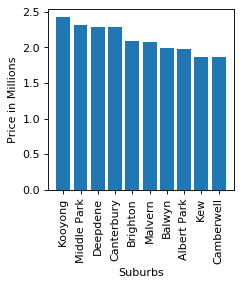

In [28]:
# analysing average housing prices for each suburb in Melbourne


housing_price_average = housing_data.groupby('Suburb')['Price(in$M)'].mean()

# top 10 most priced suburbs in melbourne
top_housing_price_average = housing_price_average.sort_values(ascending=False).iloc[0:10]

# plotting
fig, ax = plt.subplots(figsize=(3, 3), dpi= 80)
ax.bar(top_housing_price_average.index, top_housing_price_average, label='Price(in$M)')
ax.tick_params('x', rotation=90)
ax.set_xlabel('Suburbs')
ax.set_ylabel('Price in Millions')
plt.show()

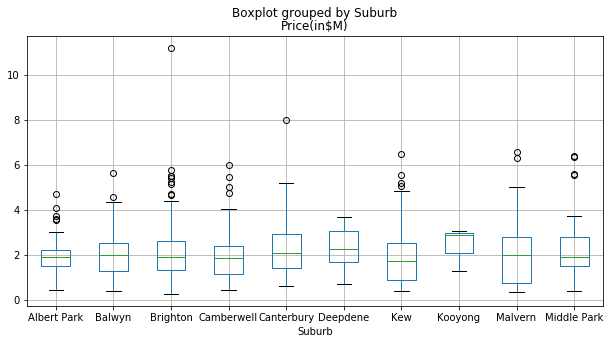

In [29]:
# analysing average housing prices for each suburb in Melbourne


top10_costly_suburbs = housing_data[housing_data.Suburb.isin(top_housing_price_average.index)]

top10_costly_suburbs.boxplot(column='Price(in$M)', by='Suburb', figsize=(10, 5))
plt.show()

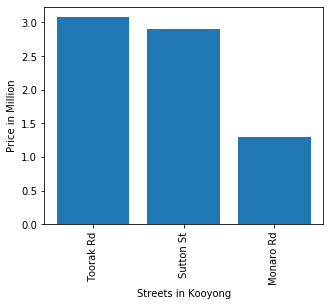

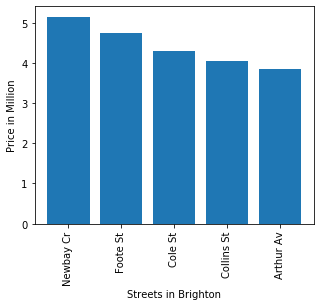

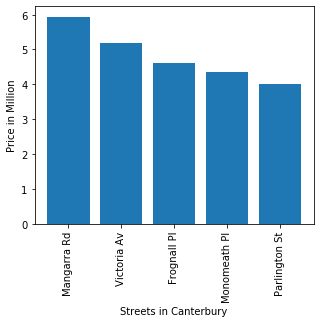

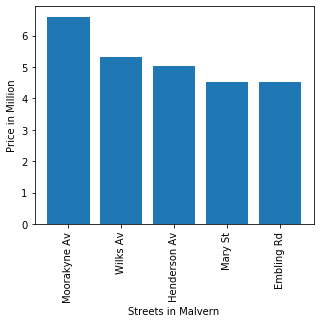

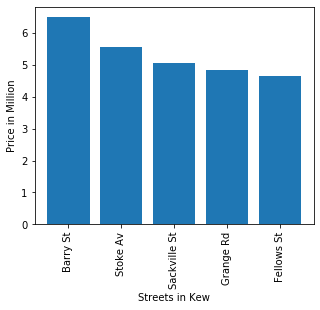

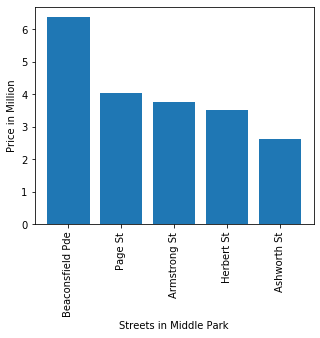

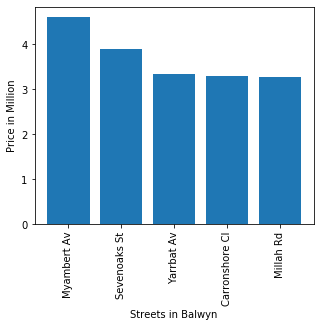

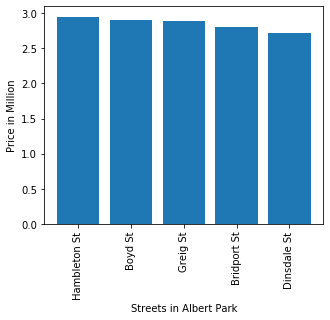

In [30]:
# analysing average housing prices for each street in each suburb in Melbourne


# extracting street address from address
housing_data['StreetAddress'] = housing_data.Address.str.split(' ').apply(lambda address_list: ' '.join(address_list[1:]))

housing_price_average_street = housing_data.groupby(['Suburb', 'StreetAddress'])['Price(in$M)'].mean()

top10_costliest_suburbs = [
    'Kooyong',
    'Brighton',
    'Canterbury',
    'Malvern',
    'Kew',
    'Middle Park',
    'Balwyn',
    'Albert Park'
]

group = housing_price_average_street.groupby('Suburb')
for suburb in top10_costliest_suburbs:
    g = group.get_group(suburb)
    top5 = g.sort_values(ascending=False).iloc[0:5]
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.bar(top5.index.get_level_values(1), top5, label=suburb)
    ax.tick_params('x', rotation=90)
    ax.set_xlabel('Streets in ' + suburb)
    ax.set_ylabel('Price in Million')
    plt.show()

#for suburb, group in housing_price_average_street.groupby('Suburb'):
#    top5 = group.sort_values(ascending=False).iloc[0:5]
#    fig, ax = plt.subplots(figsize=(5, 4))
#    ax.bar(top5.index.get_level_values(1), top5, label=suburb)
#    ax.tick_params('x', rotation=90)
#    ax.set_xlabel('Streets in ' + suburb)
#    ax.set_ylabel('Price in Million')
#    plt.show()

In [31]:
# encode physical locations to its corresponding geolocations !!Not Working right now!!


#def geocoder(row):
#    locator = Nominatim(user_agent='myGeocoder')
#    location = locator.geocode(row.name[1] + ', ' + row.name[0] + ", Australia")
#    return (location.latitude, location.longitude)
#  !!Not Working right now!!


#housing_price_average_street = housing_price_average_street.to_frame() 
# filtering streets based on client budget
#recommended_streets = housing_price_average_street[housing_price_average_street['Price(in$M)'] <= BUDGET]

#recommended_streets['Latitude'], recommended_streets['Longitude'] = recommended_streets.apply(geocoder, axis=1)

#recommended_streets.head()

In [32]:
# adding latitudes and longitudes for each of these streets


print('Client budget: AU$ {}M'.format(BUDGET))
grouping = {'Price(in$M)': 'mean', 'Lattitude': 'first', 'Longitude': 'first'}
recommended_streets = housing_data.groupby(['Suburb', 'StreetAddress']).agg(grouping)
recommended_streets = recommended_streets[recommended_streets['Price(in$M)'] <= BUDGET]
recommended_streets.head()

Client budget: AU$ 0.3M


,,Price(in$M),Lattitude,Longitude
Suburb,StreetAddress,,,
Albion,Anderson Rd,0.268333,-37.78520,144.82720
Bacchus Marsh,Lidgett St,0.285000,-37.67344,144.43181
Carnegie,Jersey Pde,0.255000,-37.88750,145.05990
Caulfield,Pyne St,0.131000,-37.88640,145.02420
Caulfield East,Tattenham St,0.300000,-37.88299,145.04711


In [33]:
print('{} streets were selected based on client budget.'.format(recommended_streets.shape[0]))

26 streets were selected based on client budget.


In [34]:
# plotting recommended locations on the map of Melbourne with current housing market prices


# Melbourne coordinates
latitude = -37.814
longitude = 144.96332
# create map of Melbourne using latitude and longitude values
map_melbourne = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, address in zip(recommended_streets['Lattitude'], recommended_streets['Longitude'], recommended_streets.index):
    address = address[1] + ", " + address[0]
    label = folium.Popup(address, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melbourne)  
    
map_melbourne

In [35]:
# define Foursquare credentials and API version


CLIENT_ID = 'R5MHPNIHCONOACDO4Q1WWWODRIBTX54TWD05FI0EZL4P4PA3' # your Foursquare ID
CLIENT_SECRET = 'EKHCYAIU4OBDZAWGZITQHPIJ1DTSWCCIKAEZT1NNICQSQSPW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R5MHPNIHCONOACDO4Q1WWWODRIBTX54TWD05FI0EZL4P4PA3
CLIENT_SECRET:EKHCYAIU4OBDZAWGZITQHPIJ1DTSWCCIKAEZT1NNICQSQSPW


In [36]:
# obtaining nearby venues to each street selected based on client budget


def getNearbyVenues(street_names, suburbs, latitudes, longitudes, radius=500):
    LIMIT = 100
    venues_list=[]
    
    print('Street Name, Suburb:')
    for street_name, suburb, lat, lng in zip(street_names, suburbs, latitudes, longitudes):
        print(street_name + ', ' + suburb)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            street_name,
            suburb,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Street', 
                             'Suburb', 
                           'Latitude', 
                          'Longitude', 
                              'Venue', 
                     'Venue Latitude', 
                    'Venue Longitude', 
                     'Venue Category']
    
    return (nearby_venues)

In [37]:
# obtaining nearby venues to each street selected based on client budget


melbourne_venues = getNearbyVenues(street_names=recommended_streets.index.get_level_values(1),
                                   suburbs=recommended_streets.index.get_level_values(0),
                                   latitudes=recommended_streets['Lattitude'],
                                   longitudes=recommended_streets['Longitude']
                                  )

print(melbourne_venues.shape)
melbourne_venues.head()
melbourne_venues.to_csv('Melbourne_venues.csv')

Street Name, Suburb:
Anderson Rd, Albion
Lidgett St, Bacchus Marsh
Jersey Pde, Carnegie
Pyne St, Caulfield
Tattenham St, Caulfield East
Venus St, Caulfield South
Rufus St, Epping
Cowper St, Footscray
Eldridge St, Footscray
Empire St, Footscray
Dandenong Rd E, Frankston
Rosedale Av, Glen Huntly
Belmont Av, Glen Iris
Currajong St, Glenroy
Park St, Hawthorn
Lewis St, Kingsville
Flinders La, Melbourne
Therry St, Melbourne
Barries Rd, Melton
Musk Ct, Melton
Blaxland Rd, Melton South
Hobart Rd, Murrumbeena
Arnott St, Ormond
Pascoe Vale Rd, Pascoe Vale
Plenty Rd, Reservoir
Canterbury Rd, Toorak
(464, 8)


In [38]:
# determining unique venues (categories) for each street in a suburb


for gname, group in melbourne_venues.groupby(['Suburb', 'Street']):
    print(gname[1] + ', ' + gname[0])
    print(group['Venue Category'].unique())
    print()

Anderson Rd, Albion
['Vietnamese Restaurant' 'Chinese Restaurant' 'Bakery' 'Afghan Restaurant'
 'Café' 'Movie Theater' 'Supermarket' 'Gastropub' 'Asian Restaurant'
 'Restaurant' 'Grocery Store' 'Gym']

Lidgett St, Bacchus Marsh
['Café' 'Supermarket' 'Fast Food Restaurant']

Jersey Pde, Carnegie
['Japanese Restaurant' 'Burger Joint' 'Bagel Shop' 'Korean Restaurant'
 'Bakery' 'Pizza Place' 'Coffee Shop' 'Dumpling Restaurant'
 'Malay Restaurant' 'Breakfast Spot' 'Supermarket' 'Thai Restaurant'
 'Ramen Restaurant' 'Café' 'Chinese Restaurant' 'Creperie' 'Shopping Mall'
 'Portuguese Restaurant' 'Vietnamese Restaurant' 'Asian Restaurant'
 'Sandwich Place' 'Train Station' 'Arts & Crafts Store' 'Pub'
 'Russian Restaurant']

Pyne St, Caulfield
['Café' 'Convenience Store' 'Pizza Place' 'Pub' 'Grocery Store' 'Gym']

Tattenham St, Caulfield East
['Juice Bar' 'Breakfast Spot' 'Train' 'Rental Car Location']

Venus St, Caulfield South
['Laundromat' 'Recreation Center' 'Yoga Studio']

Rufus St, Epping


In [39]:
# determining unique venues (categories) overall in Melbourne


melbourne_venues['Venue Category'].unique()

array(['Vietnamese Restaurant', 'Chinese Restaurant', 'Bakery',
       'Afghan Restaurant', 'Café', 'Movie Theater', 'Supermarket',
       'Gastropub', 'Asian Restaurant', 'Restaurant', 'Grocery Store',
       'Gym', 'Fast Food Restaurant', 'Japanese Restaurant',
       'Burger Joint', 'Bagel Shop', 'Korean Restaurant', 'Pizza Place',
       'Coffee Shop', 'Dumpling Restaurant', 'Malay Restaurant',
       'Breakfast Spot', 'Thai Restaurant', 'Ramen Restaurant',
       'Creperie', 'Shopping Mall', 'Portuguese Restaurant',
       'Sandwich Place', 'Train Station', 'Arts & Crafts Store', 'Pub',
       'Russian Restaurant', 'Convenience Store', 'Juice Bar', 'Train',
       'Rental Car Location', 'Laundromat', 'Recreation Center',
       'Yoga Studio', 'American Restaurant', 'Dessert Shop',
       'Big Box Store', 'Food Truck', 'Eastern European Restaurant',
       'Art Gallery', 'Gas Station', 'Bubble Tea Shop',
       'Italian Restaurant', 'Athletics & Sports', 'Park',
       'Light Rail 

In [40]:
# basic neighborhood amenities that drives up one's choice of residence


basic_amenities = [
    'Station',
    'Stop',
    'Restaurant',
    'Café',
    'Pharmacy',
    'Market',
    'Supermarket',
    'Shop',
    'University',
    'School',
    'Gym',
    'Theater',
    'Laundromat',
    'Lake',
    'Park',
    'Playground', 
]

In [41]:
# analysing each street (in a suburb) against the basic amenities in its proximity


# filtering venues based on wheter they fall into basic amenity or not
def is_amenity(row):
    for amenity in basic_amenities:
        if amenity in row:
            return True
        
    return False


# filtering venues based on wheter they fall into basic amenity or not
amenities = melbourne_venues[melbourne_venues['Venue Category'].apply(is_amenity)]

# Analyze each street
# one hot encoding
amenities = pd.get_dummies(amenities[['Venue Category']], prefix="", prefix_sep="")

# add Street and Suburb columns back to dataframe
amenities['Street'], amenities['Suburb'] = melbourne_venues['Street'], melbourne_venues['Suburb']

# adjust columns
fixed_columns = [amenities.columns[-2]] + [amenities.columns[-1]] + list(amenities.columns[:-2])
amenities = amenities[fixed_columns]

amenities.head()

,Street,Suburb,Afghan Restaurant,American Restaurant,Antique Shop,Asian Restaurant,Australian Restaurant,Bagel Shop,Bubble Tea Shop,Bus Station,Bus Stop,Café,Chinese Restaurant,Coffee Shop,Cosmetics Shop,Cupcake Shop,Dessert Shop,Dim Sum Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant,Filipino Restaurant,Food & Drink Shop,French Restaurant,Frozen Yogurt Shop,Gas Station,Gym,Gym / Fitness Center,Hobby Shop,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Laundromat,Lebanese Restaurant,Light Rail Station,Malay Restaurant,Market,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Night Market,Park,Pharmacy,Portuguese Restaurant,Ramen Restaurant,Record Shop,Restaurant,Russian Restaurant,Scandinavian Restaurant,School,Seafood Restaurant,Shopping Mall,Smoke Shop,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Supermarket,Sushi Restaurant,Thai Restaurant,Theme Restaurant,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Anderson Rd,Albion,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Anderson Rd,Albion,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Anderson Rd,Albion,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Anderson Rd,Albion,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Anderson Rd,Albion,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
# Next, let's group rows by street and suburb, and by taking the sum of the frequency of occurrence of each category


amenities_frequency = amenities.groupby(['Suburb', 'Street']).sum()
amenities_frequency.head()

,,Afghan Restaurant,American Restaurant,Antique Shop,Asian Restaurant,Australian Restaurant,Bagel Shop,Bubble Tea Shop,Bus Station,Bus Stop,Café,Chinese Restaurant,Coffee Shop,Cosmetics Shop,Cupcake Shop,Dessert Shop,Dim Sum Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant,Filipino Restaurant,Food & Drink Shop,French Restaurant,Frozen Yogurt Shop,Gas Station,Gym,Gym / Fitness Center,Hobby Shop,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Laundromat,Lebanese Restaurant,Light Rail Station,Malay Restaurant,Market,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Night Market,Park,Pharmacy,Portuguese Restaurant,Ramen Restaurant,Record Shop,Restaurant,Russian Restaurant,Scandinavian Restaurant,School,Seafood Restaurant,Shopping Mall,Smoke Shop,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Supermarket,Sushi Restaurant,Thai Restaurant,Theme Restaurant,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
Suburb,Street,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albion,Anderson Rd,1,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3
Bacchus Marsh,Lidgett St,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Carnegie,Jersey Pde,0,0,0,2,0,1,0,0,0,3,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,2,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,3,0,2,0,1,0,0,0,1
Caulfield,Pyne St,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Caulfield South,Venus St,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# recommend top 15 streets with the most total number of nearby amenities


recommended_streets = amenities.groupby(['Suburb', 'Street'])[['Afghan Restaurant']].count().sort_values('Afghan Restaurant', ascending=False)
recommended_streets.columns = ['Amenities Count']
recommended_streets = recommended_streets[0:15]

# adding location coordinates data
left = recommended_streets.reset_index()
right = melbourne_venues[['Suburb', 'Street', 'Latitude', 'Longitude']].drop_duplicates(subset=['Suburb', 'Street'])
recommended_streets = pd.merge(left=left, right=right, left_on=['Suburb', 'Street'], right_on=['Suburb', 'Street'])

recommended_streets.head(15)

,Suburb,Street,Amenities Count,Latitude,Longitude
0,Melbourne,Therry St,74,-37.80780,144.96100
1,Melbourne,Flinders La,67,-37.81990,144.95580
2,Hawthorn,Park St,48,-37.81980,145.03730
3,Carnegie,Jersey Pde,26,-37.88750,145.05990
4,Albion,Anderson Rd,12,-37.78520,144.82720
5,Toorak,Canterbury Rd,11,-37.84210,145.01040
6,Melton,Barries Rd,11,-37.68755,144.56887
7,Footscray,Empire St,8,-37.78910,144.89120
8,Footscray,Cowper St,7,-37.80530,144.90290
9,Glen Huntly,Rosedale Av,7,-37.89092,145.04392


In [44]:
# plotting recommended locations on the map of Melbourne


# Melbourne coordinates
latitude = -37.814
longitude = 144.96332
# create map of Melbourne using latitude and longitude values
map_melbourne = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, street, suburb in zip(recommended_streets['Latitude'], recommended_streets['Longitude'], recommended_streets['Street'], recommended_streets['Suburb']):
    address = street + ", " + suburb
    label = folium.Popup(address, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melbourne)  
    
map_melbourne